<a href="https://colab.research.google.com/github/kimjunwooo/python/blob/main/diabetes(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes_prediction_dataset.csv']))
# csv파일 불러오기

In [ ]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

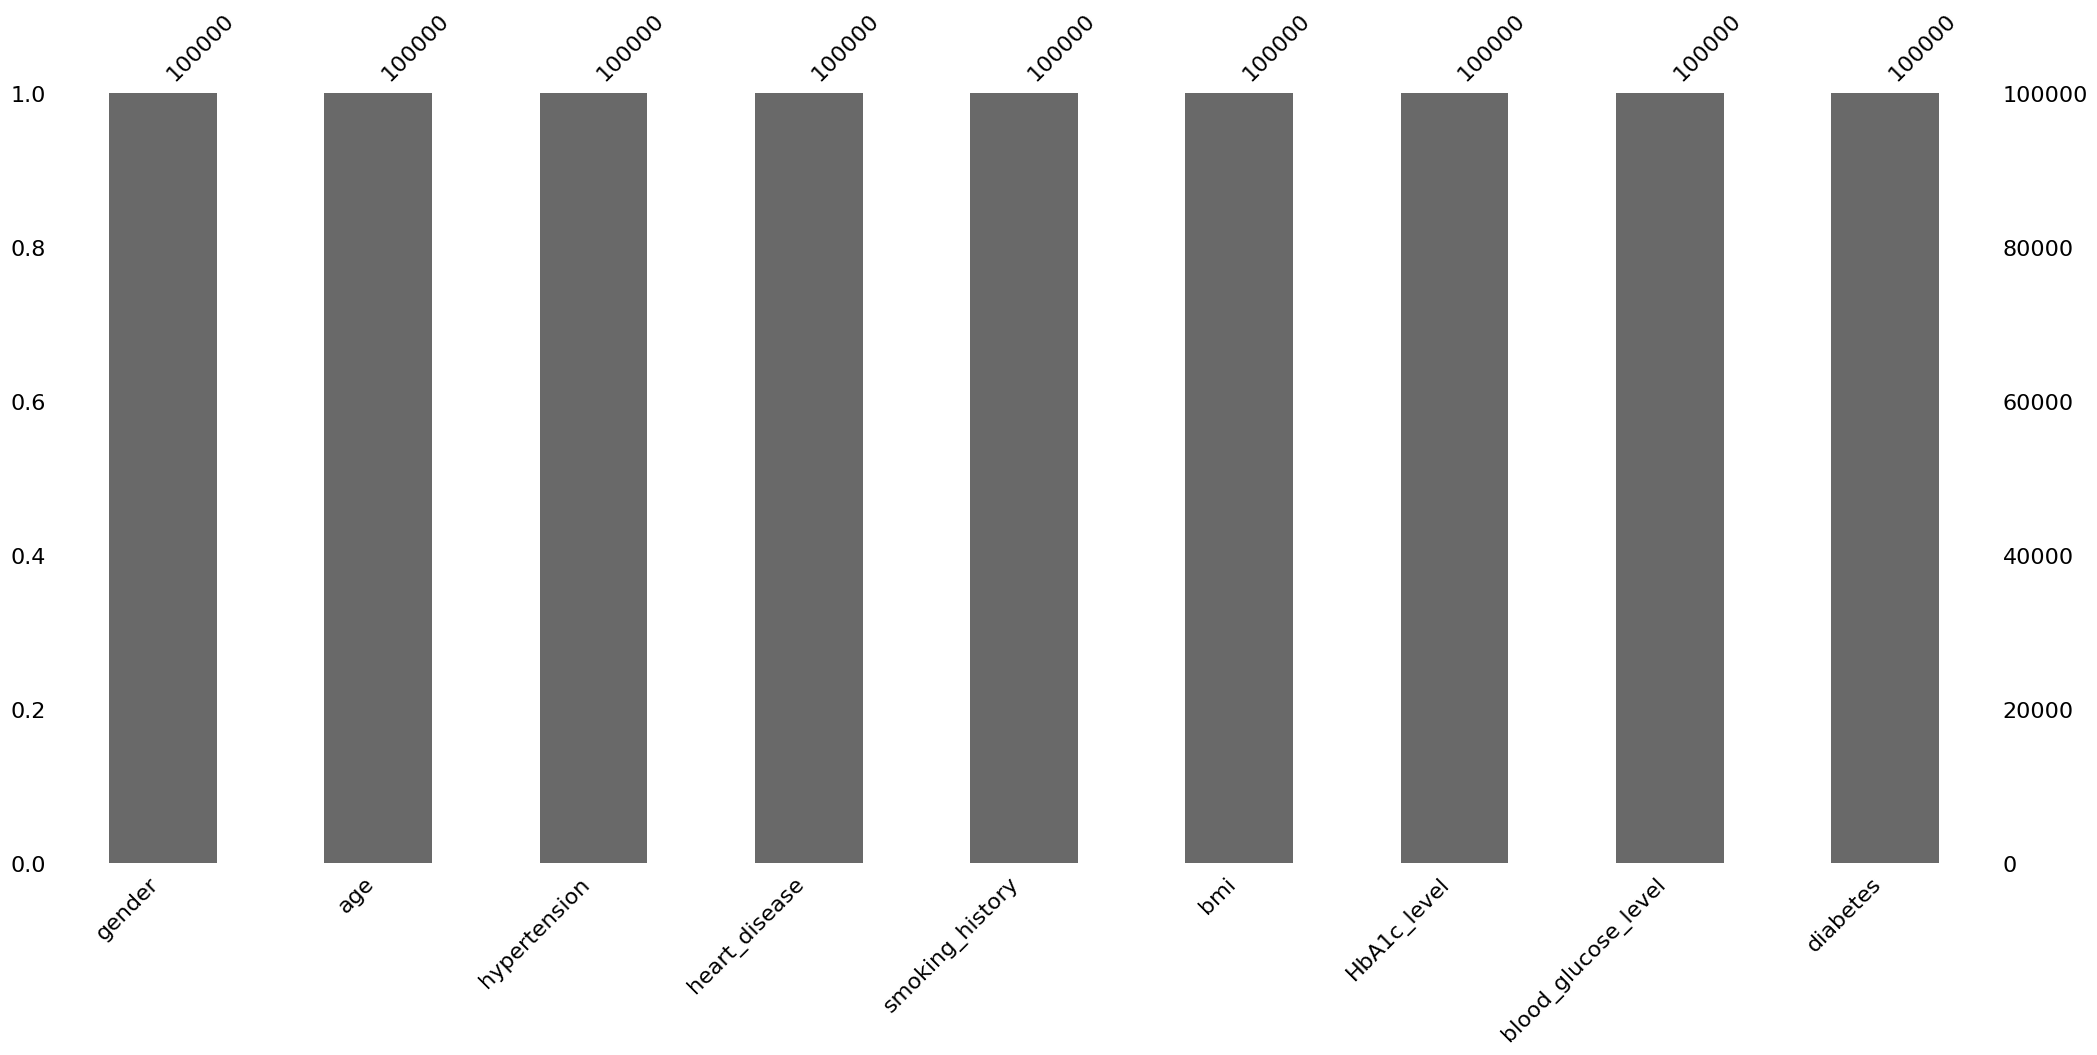

In [ ]:
msno.bar(df2) # 결측치가 없다는 것 확인.

In [ ]:
pd.crosstab(df2.gender, df2.smoking_history, margins =True)

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,19700,5058,2238,4774,22869,3913,58552
Male,16110,4228,1765,4578,12223,2526,41430
Other,6,0,1,0,3,8,18
All,35816,9286,4004,9352,35095,6447,100000


In [ ]:
pd.crosstab(df2.smoking_history, df2.diabetes, margins = True)

diabetes,0,1,All
smoking_history,,,
No Info,34362,1454,35816
current,8338,948,9286
ever,3532,472,4004
former,7762,1590,9352
never,31749,3346,35095
not current,5757,690,6447
All,91500,8500,100000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
df2['smoking_history'] = df2['smoking_history'].map(smoking_history_mapping)

In [ ]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [ ]:
X_train

array([[ 1.18538964e+00,  1.37871976e+00, -2.86309234e-01, ...,
        -3.86474489e-01, -1.89245106e+00, -1.42515661e+00],
       [ 1.18538964e+00,  1.68986587e+00, -2.86309234e-01, ...,
        -4.12172291e-01,  1.62169065e-01,  1.70590592e-01],
       [-8.42217184e-01, -1.77010751e-01, -2.86309234e-01, ...,
        -4.52986446e-01, -1.42549194e+00,  4.89740032e-01],
       ...,
       [ 1.18538964e+00,  7.87021842e-04, -2.86309234e-01, ...,
        -1.79380442e-01,  2.55560889e-01, -1.30240682e+00],
       [-8.42217184e-01, -2.21460194e-01, -2.86309234e-01, ...,
        -3.57753417e-01,  6.29128183e-01,  4.89740032e-01],
       [-8.42217184e-01, -8.43752400e-01, -2.86309234e-01, ...,
         1.00272103e-01, -4.91573701e-01,  5.14289989e-01]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
2500/2500 [==============================] - 7s 2ms/step - loss: 0.1712 - accuracy: 0.9400 - val_loss: 0.1238 - val_accuracy: 0.9558
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1194 - accuracy: 0.9573 - val_loss: 0.1169 - val_accuracy: 0.9596
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1144 - accuracy: 0.9599 - val_loss: 0.1158 - val_accuracy: 0.9599
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1125 - accuracy: 0.9606 - val_loss: 0.1135 - val_accuracy: 0.9600
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1116 - accuracy: 0.9606 - val_loss: 0.1133 - val_accuracy: 0.9603
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1112 - accuracy: 0.9606 - val_loss: 0.1129 - val_accuracy: 0.9599
Epoch 7/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1108 - accuracy: 0.9607 - val_loss: 0.1128 - val_ac

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann>0.5)

625/625 [==============================] - 1s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

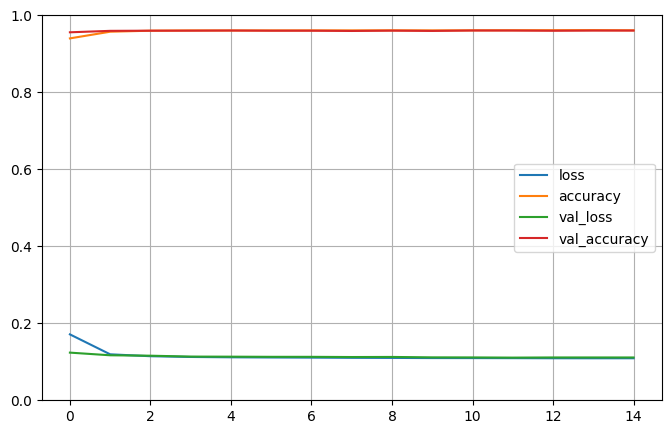

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(deep_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show